In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

# 다층 퍼셉트론

In [2]:
def 로직게이트생성(w, b):
    def logic_gate(x1, x2):
        x = np.array([x1, x2])
        z = np.sum(w*x) + b
        y = 1 if z > 0 else 0
        return y
    return logic_gate

In [3]:
def test(logic):
    for x1, x2 in [(0, 0), (0, 1), (1, 0), (1, 1)]:
        y = logic(x1, x2)
        print(x1, x2, '|', y)

In [4]:
AND = 로직게이트생성(np.array([0.5, 0.5]), -0.7)

In [5]:
test(AND)

0 0 | 0
0 1 | 0
1 0 | 0
1 1 | 1


In [6]:
NAND = 로직게이트생성(np.array([-0.5, -0.5]), 0.7)

In [7]:
test(NAND)

0 0 | 1
0 1 | 1
1 0 | 1
1 1 | 0


In [8]:
OR = 로직게이트생성(np.array([0.5, 0.5]), -0.2)

In [9]:
test(OR)

0 0 | 0
0 1 | 1
1 0 | 1
1 1 | 1


다층 퍼셉트론으로 XOR 문제 해결하기

In [10]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [11]:
test(XOR)

0 0 | 0
0 1 | 1
1 0 | 1
1 1 | 0


# 인공 신경망

In [12]:
def step(x):
    y = np.where(x > 0, 1, -1)
    return y

In [13]:
x = np.arange(-5., 5., 0.1)

In [14]:
y = step(x)

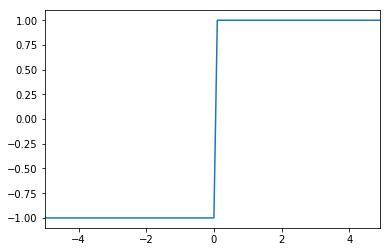

In [15]:
Series(y, index=x).plot()

In [16]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [17]:
y = sigmoid(x)

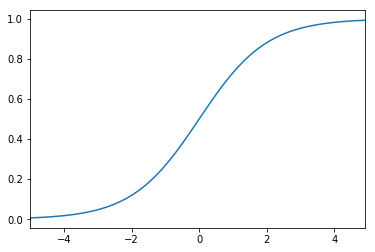

In [18]:
Series(y, index=x).plot()

In [19]:
def ReLU(x):
    return np.maximum(0, x)

In [20]:
y = ReLU(x)

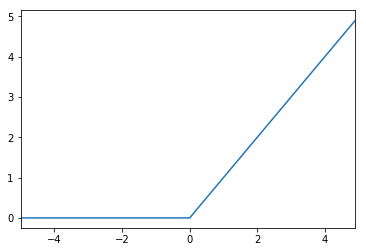

In [21]:
Series(y, index=x).plot()

신경망 순전파

In [22]:
x = np.array([1.0, 0.5])

1층 

In [23]:
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
b1 = np.array([0.1, 0.2, 0.3])

In [24]:
x.shape

(2,)

In [25]:
z1 = np.dot(x, W1) + b1

In [26]:
z1

array([ 0.3,  0.7,  1.1])

In [27]:
a1 = sigmoid(z1)

In [28]:
a1

array([ 0.57444252,  0.66818777,  0.75026011])

2층

In [29]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
b2 = np.array([0.1, 0.2])

In [30]:
z2 = np.dot(a1, W2) + b2

In [31]:
z2.shape

(2,)

In [32]:
a2 = sigmoid(z2)

In [33]:
a2.shape

(2,)

출력

In [34]:
W3 = np.array([0.1, 0.3])
b3 = 0.1

In [35]:
z3 = np.dot(a2, W3) + b3

In [36]:
a3 = sigmoid(z3)

In [37]:
y = a3

In [38]:
y

0.59722796177405213

In [39]:
1 if y > 0.5 else 0

1

## 손실함수

In [40]:
def 평균제곱오차(y, y_pred):
    return np.mean((y-y_pred)**2)

In [41]:
y = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [42]:
len(y)

10

In [43]:
y_pred1 = np.array([
    0.1, 0.05, 0.6, 0.0, 0.05, 
    0.1, 0.0, 0.1, 0.0, 0.0])

In [44]:
len(y_pred1)

10

In [45]:
y_pred1.sum()

1.0

In [46]:
y_pred2 = np.array([
    0.1, 0.05, 0.1, 0.0, 0.05,
    0.1, 0.0, 0.6, 0.0, 0.0
])

In [47]:
len(y_pred2)

10

In [48]:
y_pred2.sum()

1.0

In [49]:
loss = 평균제곱오차

In [50]:
loss(y, y_pred1)

0.019500000000000007

In [51]:
loss(y, y_pred2)

0.11950000000000001

In [52]:
def cross_entropy_error(y, y_pred):
    delta = 1e-7 # log(0) --> 무한대 방지
    return -np.sum(y*np.log(y_pred+delta))

In [53]:
loss = cross_entropy_error

In [54]:
loss(y, y_pred1)

0.51082545709933802

In [55]:
loss(y, y_pred2)

2.3025840929945458

In [56]:
iris = pd.read_csv('data/iris.data', header=None)

In [57]:
y = iris[4]
X = iris.iloc[:, 0:4]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
model = LogisticRegression()

In [61]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
model.coef_

array([[ 0.37545738,  1.38224813, -2.11110513, -0.95308905],
       [ 0.36951152, -1.37469127,  0.44182461, -1.10115604],
       [-1.46475419, -1.3875627 ,  2.1913994 ,  2.08448914]])

In [63]:
model.score(X_test, y_test)

0.97777777777777775

짠지를 담궈야 합니다...

In [64]:
import pickle

In [65]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [66]:
del model

In [67]:
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

In [68]:
model.score(X_test, y_test)

0.97777777777777775

In [69]:
X_test.shape

(45, 4)

In [70]:
X_test.iloc[0]

0    6.8
1    3.0
2    5.5
3    2.1
Name: 112, dtype: float64

In [71]:
import predict as 예측

ModuleNotFoundError: No module named 'predict'

In [ ]:
예측.__file__

In [ ]:
예측.__name__

# TensorFlow

In [72]:
import tensorflow as tf

손글씨 숫자 데이터

In [73]:
from tensorflow.examples.tutorials.mnist import input_data

In [74]:
mnist = input_data.read_data_sets('mnist/', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting mnist/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [75]:
x = mnist.train.images[0]

In [76]:
type(x)

numpy.ndarray

In [77]:
x.shape

(784,)

In [78]:
x = np.reshape(x, (28, 28))

In [79]:
x.shape

(28, 28)

In [80]:
from scipy.misc import imsave

In [81]:
imsave('mnist_sample.png', x)

신경망 모델 구성

In [82]:
x = tf.placeholder(tf.float32, [None, 784])

In [83]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

softmax는 다중분류의 출력값을 조절하는데 필수적입니다.

In [84]:
def softmax(a):
    c = np.max(a)
    ea = np.exp(a-c)
    return ea / np.sum(ea)

In [85]:
a = np.array([0.3, 2.9, 4.0])

In [86]:
a.sum()

7.1999999999999993

In [87]:
y = softmax(a)

In [88]:
y

array([ 0.01821127,  0.24519181,  0.73659691])

In [89]:
y.sum()

1.0

예측값 y

In [90]:
y = tf.nn.softmax(tf.matmul(x, W)+b)

정답 y

In [91]:
y_ = tf.placeholder(tf.float32, [None, 10])

손실함수

In [92]:
cross_entropy = tf.reduce_mean(
    -tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

경사하강법 (Gradient Descent)로 손실함수 최소화

In [93]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

계산그래프 실행

In [94]:
세션 = tf.InteractiveSession()

In [95]:
tf.global_variables_initializer().run()

1000번 훈련 수행

In [96]:
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    세션.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

모델 평가

In [97]:
y_pred = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))

In [98]:
정확도 = tf.reduce_mean(tf.cast(y_pred, tf.float32))

In [99]:
print(세션.run(
    정확도, 
    feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9172


# Keras

numpy 또는 tensorflow로 인공 신경망을 직접 만드는 것은 꽤나 힘든 일입니다.

In [101]:
import keras

Using TensorFlow backend.


In [102]:
from keras.datasets import mnist

In [103]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 115s 10us/step


In [104]:
X_train.shape

(60000, 28, 28)

In [105]:
X_train = X_train.reshape(60000, 784)

In [106]:
X_test = X_test.reshape(10000, 28*28)

In [107]:
X_test.shape

(10000, 784)

자료형이 중요합니다.

In [108]:
X_train.dtype

dtype('uint8')

In [109]:
X_train = X_train.astype('float32')

In [110]:
X_test = X_test.astype('float32')

데이터 전처리

In [111]:
X_train /= 255
X_test /= 255

In [112]:
X_train.max()

1.0

In [113]:
X_train.min()

0.0

In [114]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

One-Hot Encoding

In [115]:
from keras.utils import np_utils

In [116]:
Y_train = np_utils.to_categorical(y_train)

In [117]:
Y_test = np_utils.to_categorical(y_test)

모델 만들기

In [118]:
from keras.models import Sequential

In [119]:
model = Sequential()

층 추가

In [120]:
from keras.layers.core import Dense, Activation

In [121]:
layer1 = Dense(10, input_shape=(28*28,))

In [122]:
model.add(layer1)

In [123]:
model.add(Activation('softmax'))

모델 컴파일

In [124]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

훈련

In [125]:
history = model.fit(
    X_train, Y_train, batch_size=128, epochs=200,
    validation_split=0.2
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - ETA: 0s - loss: 1.3811 - acc: 0.663 - 1s 29us/step - loss: 1.3741 - acc: 0.6655 - val_loss: 0.8898 - val_acc: 0.8256
Epoch 2/200
48000/48000 [==============================] - 1s 30us/step - loss: 0.7928 - acc: 0.8271 - val_loss: 0.6545 - val_acc: 0.8587
Epoch 3/200
48000/48000 [==============================] - 1s 29us/step - loss: 0.6430 - acc: 0.8501 - val_loss: 0.5593 - val_acc: 0.8714
Epoch 4/200
48000/48000 [==============================] - 1s 29us/step - loss: 0.5706 - acc: 0.8610 - val_loss: 0.5068 - val_acc: 0.8797
Epoch 5/200
48000/48000 [==============================] - 1s 28us/step - loss: 0.5263 - acc: 0.8680 - val_loss: 0.4734 - val_acc: 0.8843
Epoch 6/200
48000/48000 [==============================] - 1s 28us/step - loss: 0.4961 - acc: 0.8731 - val_loss: 0.4490 - val_acc: 0.8888
Epoch 7/200
48000/48000 [==============================] - 1s 30us/step - loss: 0.47

48000/48000 [==============================] - 1s 26us/step - loss: 0.3144 - acc: 0.9130 - val_loss: 0.3016 - val_acc: 0.9160
Epoch 60/200
48000/48000 [==============================] - 1s 26us/step - loss: 0.3137 - acc: 0.9131 - val_loss: 0.3011 - val_acc: 0.9164
Epoch 61/200
48000/48000 [==============================] - 1s 27us/step - loss: 0.3131 - acc: 0.9133 - val_loss: 0.3006 - val_acc: 0.9164
Epoch 62/200
48000/48000 [==============================] - 1s 27us/step - loss: 0.3124 - acc: 0.9136 - val_loss: 0.3001 - val_acc: 0.9167
Epoch 63/200
48000/48000 [==============================] - 1s 27us/step - loss: 0.3118 - acc: 0.9134 - val_loss: 0.2996 - val_acc: 0.9168
Epoch 64/200
48000/48000 [==============================] - 1s 28us/step - loss: 0.3111 - acc: 0.9135 - val_loss: 0.2992 - val_acc: 0.9168
Epoch 65/200
48000/48000 [==============================] - 1s 27us/step - loss: 0.3106 - acc: 0.9137 - val_loss: 0.2987 - val_acc: 0.9168
Epoch 66/200
48000/48000 [==============

Epoch 118/200
48000/48000 [==============================] - 1s 27us/step - loss: 0.2904 - acc: 0.9189 - val_loss: 0.2841 - val_acc: 0.9215
Epoch 119/200
48000/48000 [==============================] - 1s 27us/step - loss: 0.2901 - acc: 0.9190 - val_loss: 0.2839 - val_acc: 0.9213
Epoch 120/200
48000/48000 [==============================] - 1s 27us/step - loss: 0.2898 - acc: 0.9190 - val_loss: 0.2838 - val_acc: 0.9216
Epoch 121/200
48000/48000 [==============================] - 1s 27us/step - loss: 0.2896 - acc: 0.9193 - val_loss: 0.2837 - val_acc: 0.9211
Epoch 122/200
48000/48000 [==============================] - 1s 26us/step - loss: 0.2894 - acc: 0.9189 - val_loss: 0.2835 - val_acc: 0.9218
Epoch 123/200
48000/48000 [==============================] - 1s 26us/step - loss: 0.2891 - acc: 0.9196 - val_loss: 0.2834 - val_acc: 0.9218
Epoch 124/200
48000/48000 [==============================] - 1s 27us/step - loss: 0.2889 - acc: 0.9195 - val_loss: 0.2831 - val_acc: 0.9217
Epoch 125/200
48000/

48000/48000 [==============================] - 1s 27us/step - loss: 0.2793 - acc: 0.9222 - val_loss: 0.2772 - val_acc: 0.9224
Epoch 177/200
48000/48000 [==============================] - 1s 28us/step - loss: 0.2792 - acc: 0.9221 - val_loss: 0.2770 - val_acc: 0.9228
Epoch 178/200
48000/48000 [==============================] - 1s 28us/step - loss: 0.2790 - acc: 0.9222 - val_loss: 0.2769 - val_acc: 0.9227
Epoch 179/200
48000/48000 [==============================] - 1s 27us/step - loss: 0.2789 - acc: 0.9221 - val_loss: 0.2768 - val_acc: 0.9227
Epoch 180/200
48000/48000 [==============================] - 1s 27us/step - loss: 0.2787 - acc: 0.9222 - val_loss: 0.2767 - val_acc: 0.9223
Epoch 181/200
48000/48000 [==============================] - 1s 27us/step - loss: 0.2786 - acc: 0.9221 - val_loss: 0.2766 - val_acc: 0.9227
Epoch 182/200
48000/48000 [==============================] - 1s 28us/step - loss: 0.2785 - acc: 0.9221 - val_loss: 0.2765 - val_acc: 0.9224
Epoch 183/200
48000/48000 [=======

In [126]:
train_results = DataFrame(history.history)

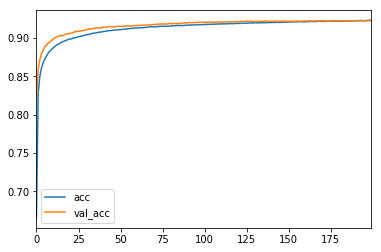

In [127]:
train_results[['acc', 'val_acc']].plot()

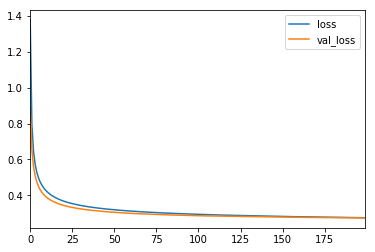

In [128]:
train_results[['loss', 'val_loss']].plot()

In [129]:
model = Sequential()

은닉층 (Hidden Layer)

1층

In [130]:
model.add(Dense(128, input_shape=(28*28,), activation='relu'))

2층

In [131]:
model.add(Dense(128, activation='relu'))

3층

In [132]:
model.add(Dense(128, activation='relu'))

출력층

In [133]:
model.add(Dense(10, activation='softmax'))

모델 컴파일

In [134]:
model.compile(
    loss='categorical_crossentropy', optimizer='sgd',
    metrics=['accuracy']
)

훈련

In [135]:
history = model.fit(
    X_train, Y_train, batch_size=128, epochs=20,
    validation_split=0.2
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 53us/step - loss: 1.6659 - acc: 0.5593 - val_loss: 0.8361 - val_acc: 0.8201
Epoch 2/20
48000/48000 [==============================] - 2s 48us/step - loss: 0.6134 - acc: 0.8456 - val_loss: 0.4434 - val_acc: 0.8809
Epoch 3/20
48000/48000 [==============================] - 2s 47us/step - loss: 0.4230 - acc: 0.8834 - val_loss: 0.3577 - val_acc: 0.8993
Epoch 4/20
48000/48000 [==============================] - 2s 47us/step - loss: 0.3609 - acc: 0.8983 - val_loss: 0.3207 - val_acc: 0.9077
Epoch 5/20
48000/48000 [==============================] - 2s 48us/step - loss: 0.3262 - acc: 0.9074 - val_loss: 0.2977 - val_acc: 0.9123
Epoch 6/20
48000/48000 [==============================] - 2s 48us/step - loss: 0.3024 - acc: 0.9136 - val_loss: 0.2788 - val_acc: 0.9201
Epoch 7/20
48000/48000 [==============================] - 2s 48us/step - loss: 0.2839 - acc: 0.9197 - val_loss: 0.2613 - val_acc

In [136]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________
